In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
import numpy as np

In [50]:
df = pd.DataFrame({'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'x1': [10.81, 6.61, 2.57, 9.48, 0.2, 2.11, 6.7, -1.75, 2.54, 0.81],
                   'x2': [0.0, 5.0, 1.0, 5.0, 8.0, 2.0, 1.0, 5.0, -4.0, -6.0],
                    'y': [0 , 1, 1,0,1,1,0,1,0,0]})

In [51]:
from joblib.disk import errno
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'x1': [10.81, 6.61, 2.57, 9.48, 0.2, 2.11, 6.7, -1.75, 2.54, 0.81],
    'x2': [0.0, 5.0, 1.0, 5.0, 8.0, 2.0, 1.0, 5.0, -4.0, -6.0],
    'y': ['⋆', '♠', '♠', '⋆', '♠', '♠', '⋆', '♠', '⋆', '⋆']
}
df = pd.DataFrame(data)
errno = 0
for i in range(len(df)):
    test_data = df.iloc[i]
    train_data = df[df.index != i]
    X_train = train_data[['x1', 'x2']]
    y_train = train_data['y']
    X_test = test_data[['x1', 'x2']].values.reshape(1, -1)
    y_test = test_data['y']
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    if y_pred != y_test:
        errno += 1
loocv_error = errno / len(df)
print(f"LOOCV error of 1NN: {loocv_error:.2f}")

LOOCV error of 1NN: 0.30


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

In [60]:
import numpy as np
point1=(2.57,1.0)
distarray=[]
for index, row in df.iterrows():
    point2=np.array((row['x1'], row['x2']))
    dist = np.linalg.norm(point1 - point2)
    distarray = np.append(distarray, dist)
df['DIST']=distarray
df_sort=df.sort_values('DIST')
print("3 nearest neighbors for data points 3 (2.57, 1.0)")
print(df_sort.iloc[1].ID)
print(df_sort.iloc[2].ID)
print(df_sort.iloc[3].ID)
point1=(0.2,0.8)
distarray=[]
for index, row in df.iterrows():
    point2=np.array((row['x1'], row['x2']))
    dist = np.linalg.norm(point1 - point2)
    distarray = np.append(distarray, dist)
df['DIST']=distarray
df_sort=df.sort_values('DIST')
print("3 nearest neighbors for data points 5 (0.2,0.8)")
print(df_sort.iloc[1].ID , df_sort.iloc[1].y)
print(df_sort.iloc[2].ID , df_sort.iloc[2].y)
print(df_sort.iloc[3].ID , df_sort.iloc[3].y)

3 nearest neighbors for data points 3 (2.57, 1.0)
6
7
9
3 nearest neighbors for data points 5 (0.2,0.8)
3 ♠
8 ♠
9 ⋆


In [63]:
import numpy as np
data_point=(2.57,1.0)
di=[]
for index, row in df.iterrows():
    point2=np.array((row['x1'], row['x2']))
    dist = np.linalg.norm(data_point - point2)
    di = np.append(di, dist)
df['distance']=di
df_sort=df.sort_values('distance')
print("3 nearest neighbors for data points 3 (2.57, 1.0)")
print(df_sort.iloc[1].ID , df_sort.iloc[1].y)
print(df_sort.iloc[2].ID , df_sort.iloc[2].y)
print(df_sort.iloc[3].ID , df_sort.iloc[3].y)
data_point=(0.2,8.0)
di=[]
for index, row in df.iterrows():
    point2=np.array((row['x1'], row['x2']))
    dist = np.linalg.norm(data_point - point2)
    di = np.append(di, dist)
df['distance']=di
df_sort=df.sort_values('distance')
print("3 nearest neighbors for data points 5 (0.2,0.8)")
print(df_sort.iloc[1].ID , df_sort.iloc[1].y)
print(df_sort.iloc[2].ID , df_sort.iloc[2].y)
print(df_sort.iloc[3].ID , df_sort.iloc[3].y)

3 nearest neighbors for data points 3 (2.57, 1.0)
6 ♠
7 ⋆
9 ⋆
3 nearest neighbors for data points 5 (0.2,0.8)
8 ♠
6 ♠
2 ♠


In [53]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
X = df[['x1', 'x2']]
y = df['y']
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
def splits(df, no):
    sp = []
    for i in range(no):
        test_indices = df.index[df.index % no == i]
        train_indices = df.index[~(df.index % no == i)]
        sp.append((train_indices, test_indices))
    return sp
cv_sp = splits(df, no=3)
cross_val_scores = cross_val_score(knn, X, y, cv=cv_sp)
cross_val_error = 1 - np.mean(cross_val_scores)
print(f"3-fold Cross-Validation Error of 3NN: {cross_val_error:.2f}")

3-fold Cross-Validation Error of 3NN: 0.44


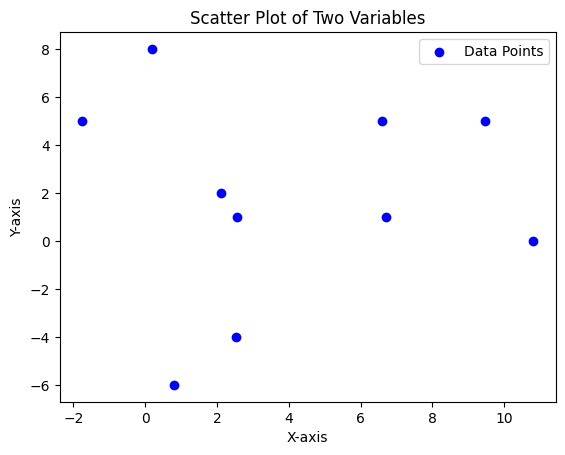

In [54]:
import matplotlib.pyplot as plt

# Sample data
x = [10.81, 6.61, 2.57, 9.48, 0.2, 2.11, 6.7, -1.75, 2.54, 0.81]
y = [0.0, 5.0, 1.0, 5.0, 8.0, 2.0, 1.0, 5.0, -4.0, -6.0]

# Create a scatter plot
plt.scatter(x, y, label='Data Points', color='blue', marker='o')

# Add labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Two Variables')

# Add a legend
plt.legend()

# Show the plot
plt.show()